In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

import astropy.io.fits as pf
from tslearn.metrics import dtw_path

import utils

In [2]:
def average_of_middle_elements(flux, size=20):
    mid_idx = int(len(flux) / 2)
    mid_values = flux[mid_idx - int(size/2):mid_idx + int(size/2) + 1]
    
    return np.mean(mid_values)

In [3]:
star = 'X0386'
PATH = f'spectra/{star}/'

In [4]:
obs_flux, obs_wl = utils.get_spectrum_data_and_wavelength(file=PATH + 'X0386_U_N_E.fits')
tel_flux, tel_wl = utils.get_spectrum_data_and_wavelength(file=PATH + 'X0386_U_N_E_TRA.fits')
corr_flux, corr_wl = utils.get_spectrum_data_and_wavelength(file=PATH + 'X0386_U_N_E_TAC.fits')

In [5]:
obs_avg_flux = average_of_middle_elements(obs_flux)
obs_normalized_flux = obs_flux / obs_avg_flux

corr_avg_flux = average_of_middle_elements(corr_flux)
corr_normalized_flux = obs_flux / corr_avg_flux

In [45]:
LIMIT = 12000

In [ ]:
start = time.time()
path, _ = dtw_path(s1=tel_flux[:LIMIT], s2=obs_normalized_flux[:LIMIT], global_constraint='sakoe_chiba')
end = time.time()

print(f'Elapsed time in milliseconds: {(end - start)*1000}')

In [ ]:
fast_path = list(zip(*path))
plt.plot(fast_path[0], fast_path[1], 'k')
plt.show()

In [ ]:
path_dict = defaultdict(list)
for i, j in path:
    path_dict[j].append(i)

In [ ]:
original_seq = tel_flux

aligned_seq = []    
for i, j in path_dict.items():
    same_path_idx = [original_seq[t] for t in j]
    aligned_seq.insert(i, np.mean(same_path_idx))

In [ ]:
utils.plot_spectrum(tel_flux[:LIMIT], tel_wl[:LIMIT], 'original tel')
utils.plot_spectrum(aligned_seq[:LIMIT], tel_wl[:LIMIT], 'aligned tel')

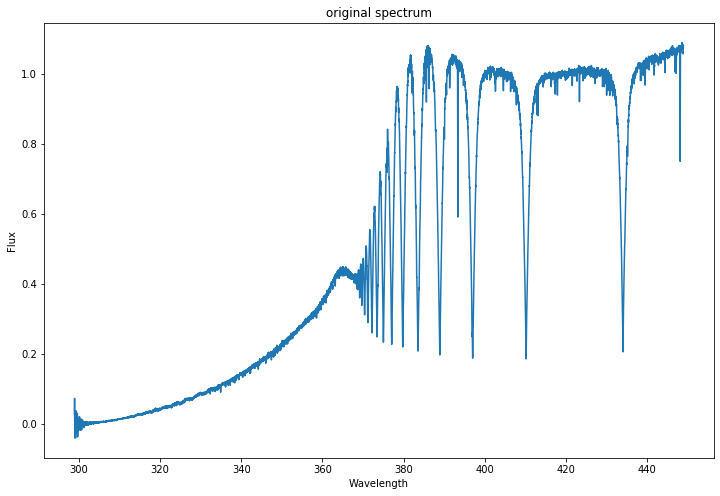

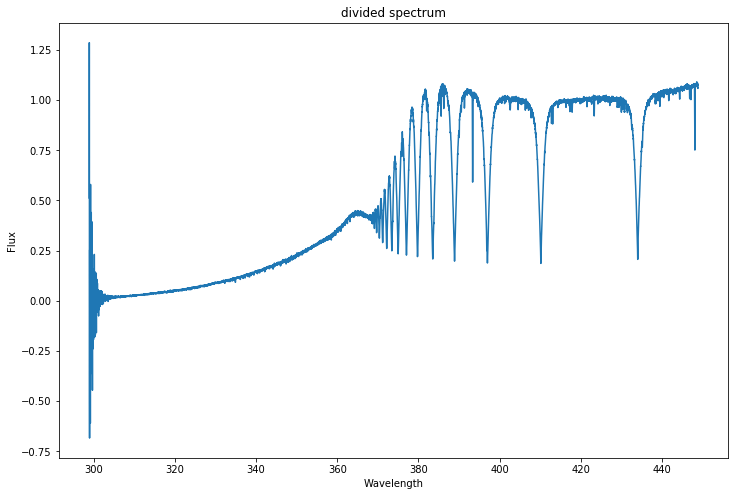

In [39]:
divided_flux = obs_normalized_flux[:LIMIT] / aligned_seq[:LIMIT]

utils.plot_spectrum(obs_normalized_flux[:LIMIT], obs_wl[:LIMIT], 'original spectrum')
utils.plot_spectrum(divided_flux, obs_wl[:LIMIT], 'divided spectrum')

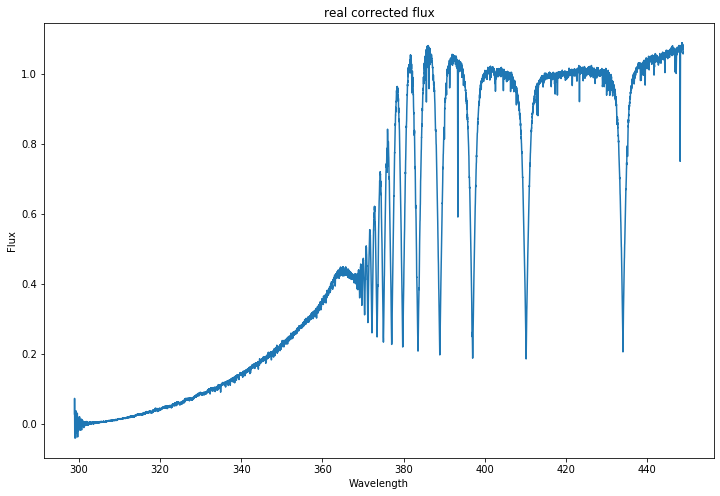

In [41]:
utils.plot_spectrum(corr_normalized_flux[:LIMIT], corr_wl[:LIMIT], 'real corrected flux')

In [32]:
original_seq[:LIMIT] - aligned_seq

array([0.        , 0.        , 0.00041016, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [15]:
divided_flux

array([0.51239847, 1.28619161, 0.29252474, ..., 0.1684597 , 0.17268609,
       0.16592136])

In [16]:
original_seq

array([0.05673778, 0.05710153, 0.05751169, ..., 0.97585726, 0.9758522 ,
       0.97584796], dtype=float32)

In [17]:
aligned_seq

[0.056737777,
 0.057101525,
 0.057101525,
 0.057511687,
 0.057873197,
 0.058130007,
 0.058290083,
 0.0584003,
 0.058509726,
 0.05865423,
 0.05886451,
 0.05918064,
 0.059652146,
 0.06031047,
 0.061131302,
 0.062029272,
 0.06290173,
 0.063683935,
 0.06436662,
 0.06497095,
 0.065515526,
 0.06600383,
 0.06643227,
 0.06680272,
 0.067128584,
 0.067436,
 0.06776413,
 0.06815893,
 0.068655565,
 0.069259845,
 0.06994696,
 0.07067965,
 0.07142808,
 0.07217514,
 0.07290819,
 0.07360921,
 0.074252255,
 0.0748098,
 0.07526248,
 0.07560802,
 0.07587073,
 0.076109044,
 0.076405175,
 0.07682804,
 0.07739328,
 0.07805846,
 0.07875774,
 0.07944029,
 0.080082744,
 0.080679946,
 0.081233434,
 0.08174617,
 0.08222062,
 0.08265801,
 0.08305854,
 0.08342275,
 0.083753765,
 0.08405852,
 0.08434479,
 0.08461666,
 0.08487441,
 0.085119545,
 0.0853604,
 0.08560893,
 0.08586484,
 0.08610067,
 0.0862714,
 0.086354665,
 0.086389616,
 0.08646751,
 0.08666816,
 0.086996816,
 0.087383725,
 0.08774656,
 0.08805261,
 0.

In [18]:
0.05710153 / 0.057101525

1.0000000875633357

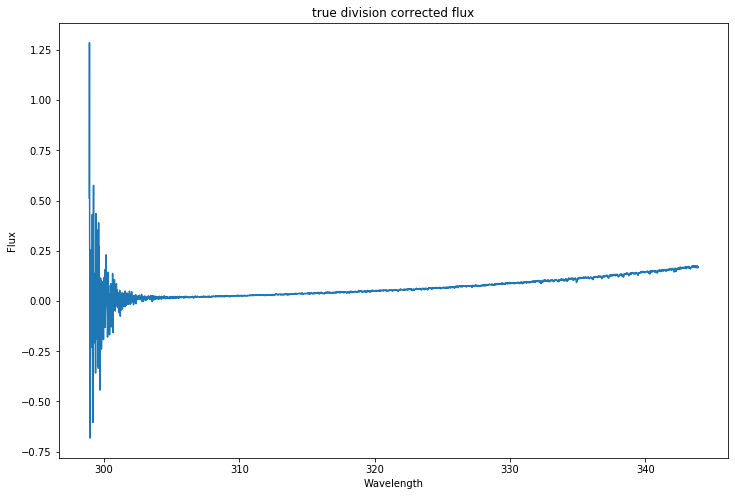

In [19]:
true_divided_spectrum = obs_normalized_flux / original_seq
utils.plot_spectrum(true_divided_spectrum[:LIMIT], obs_wl[:LIMIT], 'true division corrected flux')